In [1]:
import pandas as pd
import geopandas as gpd
import os
import folium #give preview of map -- makes leaflit accessible to python 
import csv

In [2]:
df = pd.read_csv('C:/Users/cecin/GIS495/_FinalProject/Hope/csv/Chapters.csv')

In [9]:
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'NR491 Leaflet Storymap Demo', '']
subtitle = ['Storymap Subtitle', \
    "Colleges and Universities in Wake County<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/ncsu_logo.jpg', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Add your name','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/handsondataviz/leaflet-storymaps-with-google-sheets',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

In [10]:
options_df = pd.read_csv('C:/Users/cecin/GIS495/_FinalProject/Hope/csv/Options.csv')

In [11]:
options_df

,Setting,Customize,Hints
0,Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
1,Storymap Title,Exploring Enviornmnetal and Social Burden Inde...,NaN
2,Storymap Subtitle,Analyzing Wake County by Tract Level<br><small...,"Add your subtitle, or delete that portion"
3,Storymap Logo,media/NCState.jpg,Path to a logo image
4,Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29
5,Map Settings,NaN,NaN
6,Basemap Tiles,CartoDB.Positron,[Drop-down menu for background basemap tiles](...
7,Zoom Controls,bottomright,NaN
8,Narrative Background Color,NaN,NaN
9,Narrative Text Color,NaN,NaN


In [7]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
#with automatically opens and closes a file 
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options_Template.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)
    

In [12]:
options_df['Customize']['Author Name'] = 'Cecilia Nottingham'
#options_df['Customize']['Author Github Repo Link'] = 'https://github.com/cmnottin/leaflet_storymap_2023.git'
options_df['Customize']['Storymap Title'] = 'Exploring Enviornmnetal and Social Burden Indexes in Wake County, North Carolina'
options_df['Customize']['Storymap Logo'] = 'media/NCState.jpg'
# save your options df as Options.csv
options_df.to_csv('./csv/Options.csv')

In [13]:
m = folium.Map(location=[35.7796, -78.6382], zoom_start=14, control_scale=True)
m

In [15]:
header = ['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link', 'Description', \
    'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency', \
    'GeoJSON Overlay', 'GeoJSON Feature Properties']

In [16]:
chapter_df = pd.read_csv('./csv/Chapters.csv')
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,"Introduction to Wake County, NC",NaN,NaN,NaN,Wake Count is one of one hundred counties in N...,NaN,NaN,NaN,NaN,35.782172,-78.654201,geojson/ClipGEO.json,0.8,geojson/ClipGEO.geojson,fillColor:blue;color:black
1,Population Dynamics within Wake County,media/pops.png,NaN,NaN,"The population in Raleigh, NC has rapidly incr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Environmnetal Justice Index Rank by Tract,media/EJRank.png,NaN,NaN,According to the Environmental Protection Agen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Environmnetal Burden Percentile Rank,media/EB.png,NaN,NaN,The Environmental Burden Percentile Rank contr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Social Vulnerability Percentile Rank,media/SI.png,NaN,NaN,The Social Vulnerability Percentile Rank also ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Water Quality Testing,NaN,NaN,NaN,Currently there is a project that focuses on a...,dissolved oxygen,conductivity,nitrates and nitrates,as well as others. These three sites are a pa...,NaN,NaN,NaN,NaN,NaN,NaN
6,More Information,NaN,NaN,NaN,More information can be found at the Agency fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,"Introduction to Wake County, NC",NaN,NaN,NaN,Wake Count is one of one hundred counties in N...,NaN,NaN,NaN,NaN,35.782172,-78.654201,geojson/ClipGEO.json,0.8,geojson/ClipGEO.geojson,fillColor:blue;color:black
1,Population Dynamics within Wake County,media/pops.png,NaN,NaN,"The population in Raleigh, NC has rapidly incr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Environmnetal Justice Index Rank by Tract,media/EJRank.png,NaN,NaN,According to the Environmental Protection Agen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Environmnetal Burden Percentile Rank,media/EB.png,NaN,NaN,The Environmental Burden Percentile Rank contr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Social Vulnerability Percentile Rank,media/SI.png,NaN,NaN,The Social Vulnerability Percentile Rank also ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Water Quality Testing,NaN,NaN,NaN,Currently there is a project that focuses on a...,dissolved oxygen,conductivity,nitrates and nitrates,as well as others. These three sites are a pa...,NaN,NaN,NaN,NaN,NaN,NaN
6,More Information,NaN,NaN,NaN,More information can be found at the Agency fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# chapter_df.loc[[0], ['Chapter']] = 'Introduction to Wake County, NC'
# chapter_df.loc[[1], ['Chapter']] = 'Population Dynamics within Wake County'
# chapter_df.loc[[2], ['Chapter']] = 'Environmnetal Justice Index Rank by Tract'
# chapter_df.loc[[3], ['Chapter']] = 'Environmnetal Burden Percentile Rank'
# chapter_df.loc[[4], ['Chapter']] = 'Social Vulnerability Percentile Rank'
# chapter_df.loc[[5], ['Chapter']] = 'Conclusion'

In [18]:
EJgeo = gpd.read_file('C:/Users/cecin/GIS495/_FinalProject/Hope/geojson/EJgeo.geojson')
BPgeo = gpd.read_file('C:/Users/cecin/GIS495/_FinalProject/Hope/geojson/BPgeo.geojson')
SIgeo = gpd.read_file('C:/Users/cecin/GIS495/_FinalProject/Hope/geojson/SIgeo.geojson')
Clipgeo = gpd.read_file('C:/Users/cecin/GIS495/_FinalProject/Hope/geojson/ClipGEO.geojson')

<Axes: >

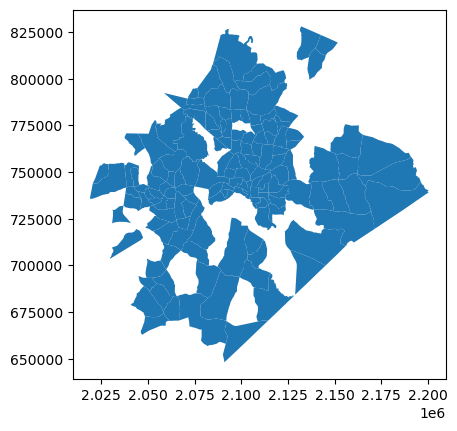

In [28]:
EJgeo.plot()

<Axes: >

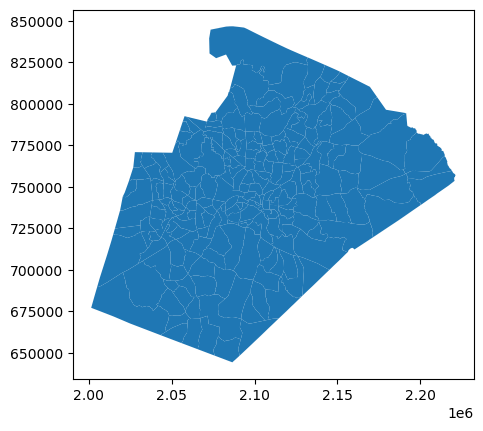

In [29]:
Clipgeo.plot()

<Axes: >

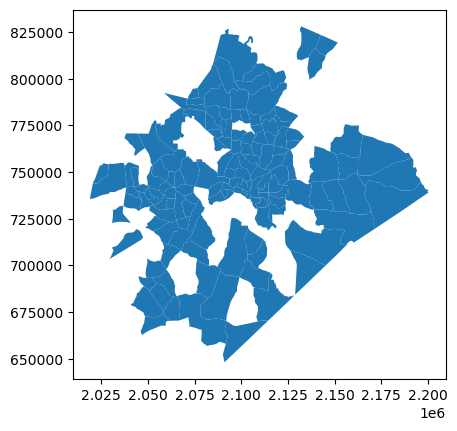

In [30]:
BPgeo.plot()

<Axes: >

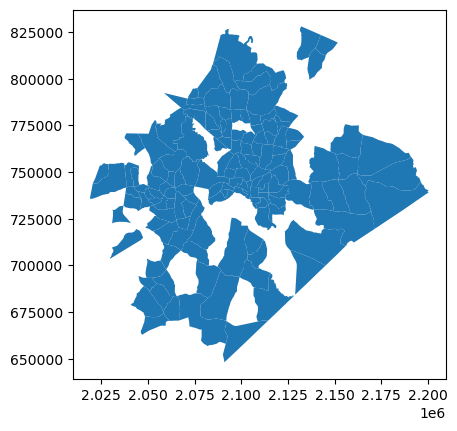

In [31]:
EJgeo.plot()

In [19]:
CLIP = Clipgeo.rename(columns={'INTPTLAT': 'Y', 'INTPTLON': 'X'})

In [20]:
CLIP

,field_1,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,Y,X,geometry
0,1699,37,85,71003,37085071003,710.03,Census Tract 710.03,G5020,S,51981453,43323,35.495545,-78.836148,"MULTIPOLYGON (((2045609.308 659629.465, 204563..."
1,212,37,85,70901,37085070901,709.01,Census Tract 709.01,G5020,S,6691154,85151,35.512673,-78.721932,"MULTIPOLYGON (((2081932.665 645887.619, 208201..."
2,1483,37,183,53115,37183053115,531.15,Census Tract 531.15,G5020,S,16240627,53269,35.541807,-78.715989,"MULTIPOLYGON (((2075116.392 651668.248, 207513..."
3,1484,37,183,53114,37183053114,531.14,Census Tract 531.14,G5020,S,17964761,214259,35.569471,-78.760649,"MULTIPOLYGON (((2065800.304 652078.780, 206583..."
4,286,37,101,41508,37101041508,415.08,Census Tract 415.08,G5020,S,23110426,40635,35.543974,-78.662753,"MULTIPOLYGON (((2088151.268 645516.805, 208825..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,730,37,63,1806,37063001806,18.06,Census Tract 18.06,G5020,S,35564033,4431202,36.019417,-78.790272,"MULTIPOLYGON (((2073508.646 844775.976, 207339..."
258,2069,37,69,60602,37069060602,606.02,Census Tract 606.02,G5020,S,111541055,714666,36.003255,-78.331355,"MULTIPOLYGON (((2171889.643 807009.621, 217188..."
259,1618,37,69,60502,37069060502,605.02,Census Tract 605.02,G5020,S,78989626,570106,36.027203,-78.439869,"MULTIPOLYGON (((2171889.643 807009.621, 217151..."
260,741,37,77,970604,37077970604,9706.04,Census Tract 9706.04,G5020,S,52726000,1886722,36.093930,-78.621190,"MULTIPOLYGON (((2117189.460 834562.632, 211716..."


In [21]:
import folium

# Create a base map
m = folium.Map(location=[35.7796, -78.6382], zoom_start=12)

# Create a FeatureGroup for Chapter 1
chapter1_group = folium.FeatureGroup(name='Water Quality Testing')

# Add markers for Chapter 1
marker1 = folium.Marker(location=[35.77385, -78.63249], popup='Site One')
marker2 = folium.Marker(location=[35.77230, -78.63145], popup='Site Two')
marker3 = folium.Marker(location=[35.760043, -78.6249797], popup='Site Three')

# Add markers to Chapter 1 FeatureGroup
chapter1_group.add_child(marker1)
chapter1_group.add_child(marker2)
chapter1_group.add_child(marker3)

# Add Chapter 1 FeatureGroup to the map
m.add_child(chapter1_group)

# Optionally, add a layer control to toggle chapters
folium.LayerControl().add_to(m)

# Display the map
m

In [22]:
for idx, row in CLIP.iterrows():
#  Get lat and lon of points
   lon = row['X']
   lat = row['Y']

#     # Get college information
#EJ_name = row['NAMELSAD']

    #Add markers to the map
folium.Marker([lat,lon], popup=['marker']).add_to(m)

In [23]:
m

In [24]:
EJgeo.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur